# Employee Turnover Prediction

Problem statement: 

The goal is to find out the employees who stay and leave the company in the upcoming year.Based on the given features,we performed Exploratory Data Analysis, Descriptive Statistical Analysis, Outlier analysis, Feature Engineering, and Feature Selection and made the change as per requirements.Created Data visualizations using Seaborn and Matplotlib libraries to find the insight patterns.Used Machine Learning algorithms to build predictive models to find the best accuracy.

# Project Task 3: Feature Selection

Task Explanation :

● Perform feature selection on numerical and categorical features separately.

● Removing features with zero variance, make use of visualization.

● Apply feature discretisation of continuous numerical. Use appropriate methods from
  sklearn feature selection library.

● Convert character features to numeric.

# Importing Libraries

In [2]:
#for Manipulations
import pandas as pd
import numpy as np

#for Data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for Scientific computations
from scipy import stats
from sklearn.preprocessing import LabelEncoder

#To Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [3]:
import os
emp = pd.read_csv('employee.csv')

In [4]:
emp.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,M,Divorced,No,Sometimes,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,M,Single,No,Mostly,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,M,Single,Yes,Sometimes,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,M,Divorced,No,Sometimes,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,M,Single,Yes,Sometimes,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24


In [5]:
#Checking the columns
emp.columns

Index(['EmployeId', 'Age', 'Gender', 'MaritalStatus', 'Turnover', 'Travelling',
       'Vertical', 'Qualifications', 'EducationField', 'EmployeSatisfaction',
       'JobEngagement', 'JobLevel', 'JobSatisfaction', 'Role', 'DailyBilling',
       'HourBilling', 'MonthlyBilling', 'MonthlyRate', 'Work Experience',
       'OverTime', 'PercentSalaryHike', 'Last Rating',
       'RelationshipSatisfaction', 'Hours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'Work&Life', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'DistanceFromHome'],
      dtype='object')

In [6]:
#Checking the shape of the dataset
emp.shape

(1470, 32)

In [7]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeId                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   Turnover                  1470 non-null   object
 5   Travelling                1470 non-null   object
 6   Vertical                  1470 non-null   object
 7   Qualifications            1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeSatisfaction       1470 non-null   int64 
 10  JobEngagement             1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobSatisfaction           1470 non-null   int64 
 13  Role                      1470 non-null   object
 14  DailyBilling            

In [8]:
#To find sum of all missing values in the whole dataframe
emp.isnull().sum().sum()

0

In [9]:
#Checking duplicate values
emp.duplicated().sum()

0

# Perform feature selection on numerical and categorical features separately.

In [11]:
#Split the numerical features from the dataset
numeric = emp.select_dtypes("number")

In [12]:
numeric.head()

,EmployeId,Age,Qualifications,EmployeSatisfaction,JobEngagement,JobLevel,JobSatisfaction,DailyBilling,HourBilling,MonthlyBilling,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,1,3,3,1,1,368,37,7062,...,4,80,1,2,3,3,2,2,2,2
1,723,23,1,2,3,1,3,599,97,2036,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,4,2,3,2,4,833,34,6052,...,3,80,0,3,4,7,7,0,0,10
3,51,30,4,3,3,3,3,291,66,10047,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,3,4,3,1,4,143,61,1398,...,1,80,0,2,3,3,2,2,2,24


In [17]:
numeric.shape

(1470, 24)

In [14]:
#Split the categorical features from the dataset 
category = emp.select_dtypes("object")

In [15]:
category.head()

,Gender,MaritalStatus,Turnover,Travelling,Vertical,EducationField,Role,OverTime
0,M,Divorced,No,Sometimes,Research & Development,Medical,Laboratory Technician,No
1,M,Single,No,Mostly,Sales,Life Sciences,Sales Representative,No
2,M,Single,Yes,Sometimes,Human Resources,Life Sciences,Manager,No
3,M,Divorced,No,Sometimes,Research & Development,Medical,Manufacturing Director,No
4,M,Single,Yes,Sometimes,Sales,Technical Degree,Sales Representative,No


In [18]:
category.shape

(1470, 8)

In [19]:
#Converting some category features to numeric features
le=LabelEncoder()
le

LabelEncoder()

In [20]:
category['Gender'] = le.fit_transform(category['Gender'])
category['MaritalStatus'] = le.fit_transform(category['MaritalStatus'])
category['Turnover'] = le.fit_transform(category['Turnover'])
category['Travelling'] = le.fit_transform(category['Travelling'])
category['OverTime'] = le.fit_transform(category['OverTime'])

In [21]:
category.head()

,Gender,MaritalStatus,Turnover,Travelling,Vertical,EducationField,Role,OverTime
0,1,0,0,2,Research & Development,Medical,Laboratory Technician,0
1,1,2,0,0,Sales,Life Sciences,Sales Representative,0
2,1,2,1,2,Human Resources,Life Sciences,Manager,0
3,1,0,0,2,Research & Development,Medical,Manufacturing Director,0
4,1,2,1,2,Sales,Technical Degree,Sales Representative,0


In [22]:
emp=pd.concat([category,numeric], axis=1)
emp.head()

,Gender,MaritalStatus,Turnover,Travelling,Vertical,EducationField,Role,OverTime,EmployeId,Age,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,1,0,0,2,Research & Development,Medical,Laboratory Technician,0,63,29,...,4,80,1,2,3,3,2,2,2,2
1,1,2,0,0,Sales,Life Sciences,Sales Representative,0,723,23,...,4,80,0,3,3,1,0,0,0,6
2,1,2,1,2,Human Resources,Life Sciences,Manager,0,1297,36,...,3,80,0,3,4,7,7,0,0,10
3,1,0,0,2,Research & Development,Medical,Manufacturing Director,0,51,30,...,2,80,3,5,3,10,6,3,9,12
4,1,2,1,2,Sales,Technical Degree,Sales Representative,0,1498,29,...,1,80,0,2,3,3,2,2,2,24


# Removing features with zero variance, make use of visualization.

<AxesSubplot:xlabel='Hours', ylabel='Turnover'>

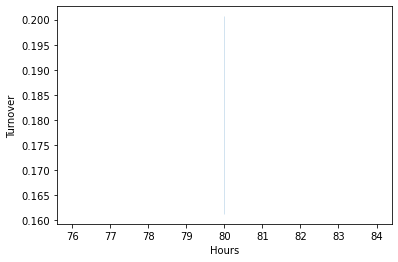

In [23]:
#Dropping column having zero variance in numerical features
sns.lineplot( emp['Hours'], emp['Turnover'])

#We can see that HOURS is having ZERO VARIANCE, so we can remove this feature.

In [24]:
emp.drop('Hours',axis=1, inplace=True)

In [26]:
emp.columns

Index(['Gender', 'MaritalStatus', 'Turnover', 'Travelling', 'Vertical',
       'EducationField', 'Role', 'OverTime', 'EmployeId', 'Age',
       'Qualifications', 'EmployeSatisfaction', 'JobEngagement', 'JobLevel',
       'JobSatisfaction', 'DailyBilling', 'HourBilling', 'MonthlyBilling',
       'MonthlyRate', 'Work Experience', 'PercentSalaryHike', 'Last Rating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'Work&Life', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager',
       'DistanceFromHome'],
      dtype='object')

In [ ]:
#Hence the Hours column has removed from the above dataset

<AxesSubplot:xlabel='Age', ylabel='Turnover'>

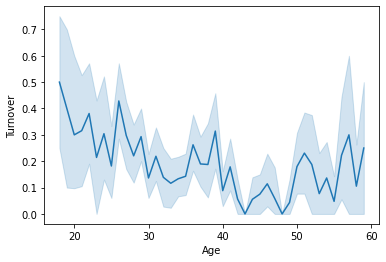

In [27]:
sns.lineplot( emp['Age'], emp['Turnover'])
#We can see that AGE is not having ZERO VARIANCE, so we cannot remove this feature.

<AxesSubplot:xlabel='Gender', ylabel='Turnover'>

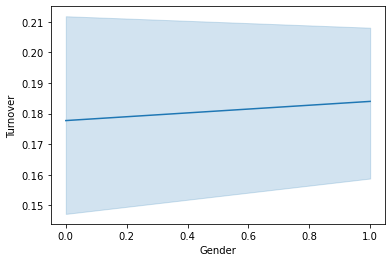

In [28]:
sns.lineplot( emp['Gender'], emp['Turnover'])
#We can see that Gender is having ZERO VARIANCE, so we can remove this feature.

In [29]:
emp.drop('Gender',axis=1, inplace=True)

In [30]:
emp.columns

Index(['MaritalStatus', 'Turnover', 'Travelling', 'Vertical', 'EducationField',
       'Role', 'OverTime', 'EmployeId', 'Age', 'Qualifications',
       'EmployeSatisfaction', 'JobEngagement', 'JobLevel', 'JobSatisfaction',
       'DailyBilling', 'HourBilling', 'MonthlyBilling', 'MonthlyRate',
       'Work Experience', 'PercentSalaryHike', 'Last Rating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'Work&Life', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager',
       'DistanceFromHome'],
      dtype='object')

In [ ]:
#Hence the gender column has removed from the above dataset

<AxesSubplot:xlabel='MaritalStatus', ylabel='Turnover'>

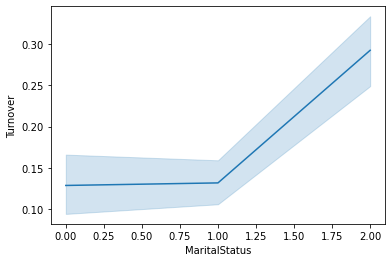

In [31]:
sns.lineplot( emp['MaritalStatus'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='Age', ylabel='Turnover'>

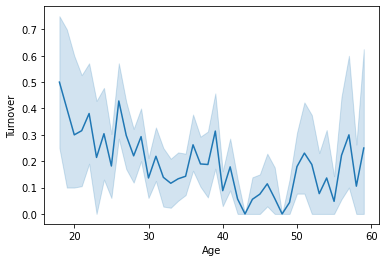

In [36]:
sns.lineplot( emp['Age'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Turnover'>

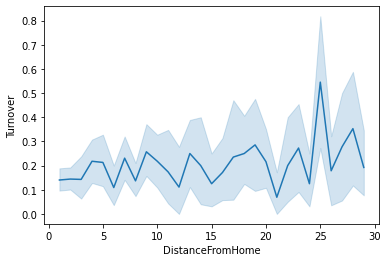

In [33]:
sns.lineplot(emp['DistanceFromHome'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='YearsWithCurrentManager', ylabel='Turnover'>

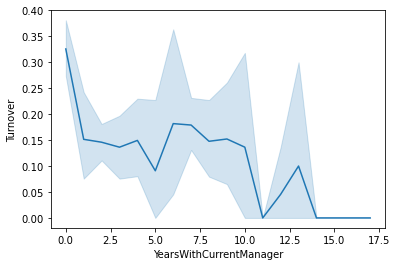

In [34]:
sns.lineplot(emp['YearsWithCurrentManager'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Turnover'>

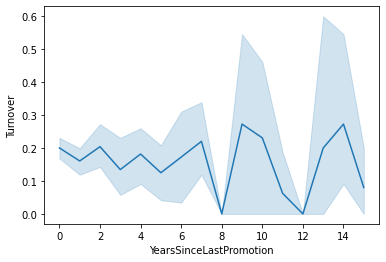

In [35]:
sns.lineplot(emp['YearsSinceLastPromotion'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='Qualifications', ylabel='Turnover'>

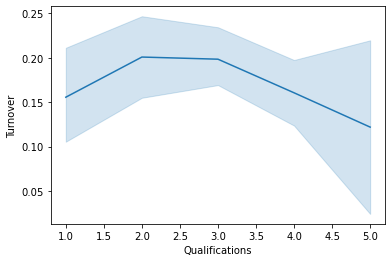

In [37]:
sns.lineplot(emp['Qualifications'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='EmployeSatisfaction', ylabel='Turnover'>

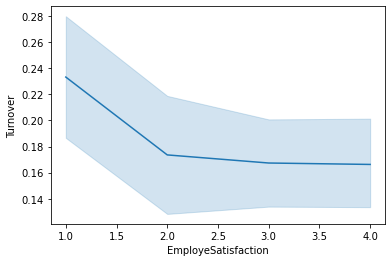

In [38]:
sns.lineplot(emp['EmployeSatisfaction'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='JobEngagement', ylabel='Turnover'>

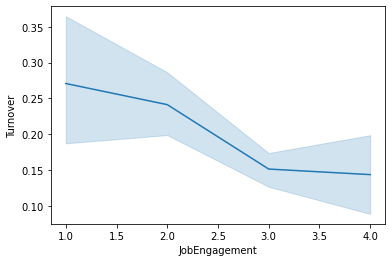

In [39]:
sns.lineplot(emp['JobEngagement'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='JobLevel', ylabel='Turnover'>

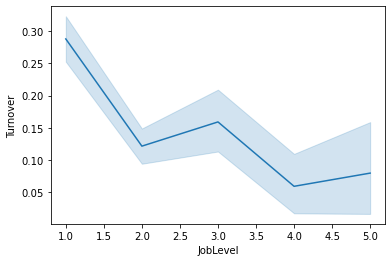

In [40]:
sns.lineplot(emp['JobLevel'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Turnover'>

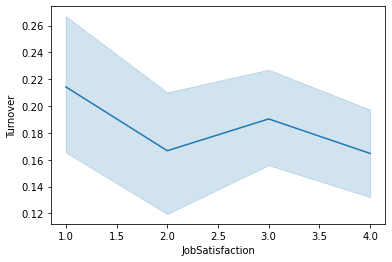

In [41]:
sns.lineplot(emp['JobSatisfaction'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Turnover'>

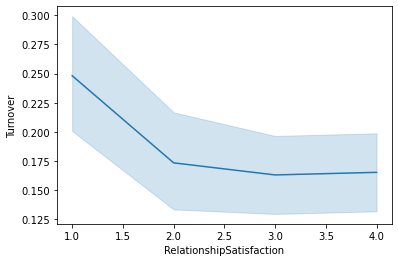

In [42]:
sns.lineplot(emp['RelationshipSatisfaction'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Turnover'>

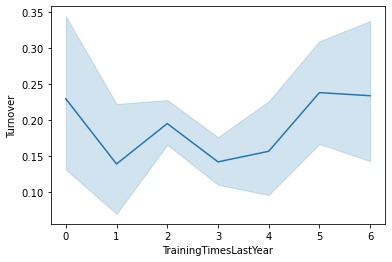

In [43]:
sns.lineplot(emp['TrainingTimesLastYear'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Turnover'>

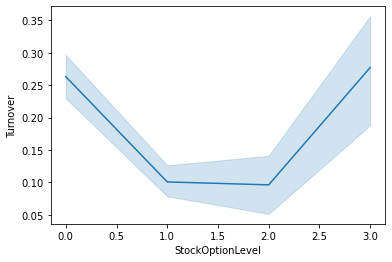

In [44]:
sns.lineplot(emp['StockOptionLevel'], emp['Turnover'])
#This feature is not having ZERO VARIANCE, hence it cannot be removed.

In [45]:
emp.head()

,MaritalStatus,Turnover,Travelling,Vertical,EducationField,Role,OverTime,EmployeId,Age,Qualifications,...,Last Rating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0,0,2,Research & Development,Medical,Laboratory Technician,0,63,29,1,...,4,4,1,2,3,3,2,2,2,2
1,2,0,0,Sales,Life Sciences,Sales Representative,0,723,23,1,...,3,4,0,3,3,1,0,0,0,6
2,2,1,2,Human Resources,Life Sciences,Manager,0,1297,36,4,...,3,3,0,3,4,7,7,0,0,10
3,0,0,2,Research & Development,Medical,Manufacturing Director,0,51,30,4,...,3,2,3,5,3,10,6,3,9,12
4,2,1,2,Sales,Technical Degree,Sales Representative,0,1498,29,3,...,3,1,0,2,3,3,2,2,2,24


In [46]:
emp.columns

Index(['MaritalStatus', 'Turnover', 'Travelling', 'Vertical', 'EducationField',
       'Role', 'OverTime', 'EmployeId', 'Age', 'Qualifications',
       'EmployeSatisfaction', 'JobEngagement', 'JobLevel', 'JobSatisfaction',
       'DailyBilling', 'HourBilling', 'MonthlyBilling', 'MonthlyRate',
       'Work Experience', 'PercentSalaryHike', 'Last Rating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'Work&Life', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager',
       'DistanceFromHome'],
      dtype='object')

In [47]:
#Hence hours and Gender columns has removed from the dataset due to Zero variance.

# Conclusion

In the above dataset, we apply feature selection on categorical as well as numerical features to find the insights.Based on the zero variance, we dropped the hours and gender column  and using seaborn to visualize all the columns.Finally we dropped unwanted columns from the dataset.
